# Lesson 9 Practical Application

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

This lab focuses around manipulating and presenting data in a format that is helpful for people who want to know more about the data. We begin by reading in the tips.csv data set. We will then find out the mean tip broken down by sex.

In [2]:
tips = Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
tips.select(["sex","tip"]).group("sex",np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


Now that we have found the mean tip broken down by sex, we'd like to explore visualisations of tips broken down by both sex and time. These plots can be found below.

C:\Users\C20Joseph.Belina\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


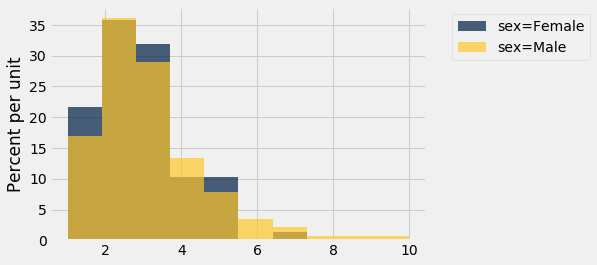

In [4]:
tips.hist("tip",group="sex")

C:\Users\C20Joseph.Belina\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


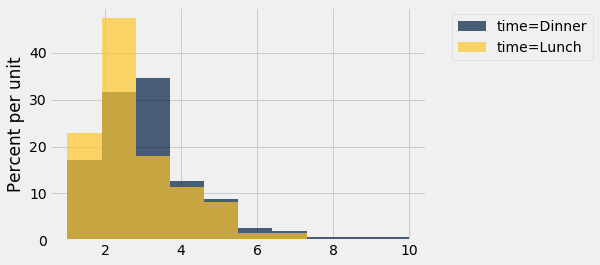

In [5]:
tips.hist("tip",group="time")

We will now switch gears and learn more about table manipulation to data types that are more suitable for our purposes. We begin by creating a function that will take a day of the week and return its numerical value within that week. Then we will apply this function to the tips data and place it in a new column.

In [8]:
def weekday_to_num(day):
    ''' Turns the string of the day of order to the number of the day '''
    if day=="Sun":
        day=7
    elif day=="Mon":
        day=1
    elif day=="Tues":
        day=2
    elif day=="Wed":
        day=3
    elif day=="Thurs":
        day=4
    elif day=="Fri":
        day=5
    elif day=="Sat":
        day=6
    return day

weekday_to_num("Sun")

7

In [9]:
day_num = tips.select('day').apply(weekday_to_num,'day')
tips = tips.with_column('Day Number',day_num)
tips

total_bill,tip,sex,smoker,day,time,size,Day Number
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


In order to make inferences on the data pertaining to prediction of tips, we will define a function that estimates tips for a given bill based on the data found in the tips data set. To do this, we will make an average of the tips near the bill of interest.

In [12]:
def est_tip(near,bill):
    ''' Estimates tip for a given bill based on data found in the tips data set '''
    tip = sum(tips.where('total_bill',are.between(bill-near,bill+near))[1])/len(tips.where('total_bill',are.between(bill-near,bill+near))[1])
    return tip

In [13]:
est_tip(3,20)

3.1146774193548397

Finally, we will apply the est_tip function to the data set under a new column called "est_tip." We will then display the actual tip and calculated estimated tip on the same scatterplot as a function of the total bill.

In [14]:
estimate = []
for bill in(tips[0]):
    estimate.append(est_tip(1,bill).round(2))
tips.append_column('est_tip',estimate)
tips

total_bill,tip,sex,smoker,day,time,size,Day Number,est_tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.82
10.34,1.66,Male,No,Sun,Dinner,3,7,1.81
21.01,3.5,Male,No,Sun,Dinner,3,7,3.34
23.68,3.31,Male,No,Sun,Dinner,2,7,3.34
24.59,3.61,Female,No,Sun,Dinner,4,7,3.56
25.29,4.71,Male,No,Sun,Dinner,4,7,4.2
8.77,2,Male,No,Sun,Dinner,2,7,1.86
26.88,3.12,Male,No,Sun,Dinner,4,7,3.48
15.04,1.96,Male,No,Sun,Dinner,2,7,2.43
14.78,3.23,Male,No,Sun,Dinner,2,7,2.44


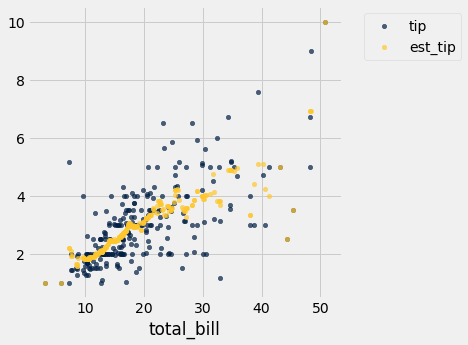

In [20]:
tips.scatter("total_bill",["tip","est_tip"])